# Data Mining Final Project
Perform apriori algorithm to market basket analysis.
Dataset is from [here](https://www.kaggle.com/datasets/irfanasrullah/groceries).

In [16]:
import seaborn as sns
import pandas as pd

In [2]:
import csv
with open('groceries.csv') as file:
    reader = csv.reader(file)
    dataset = list(reader)

7311


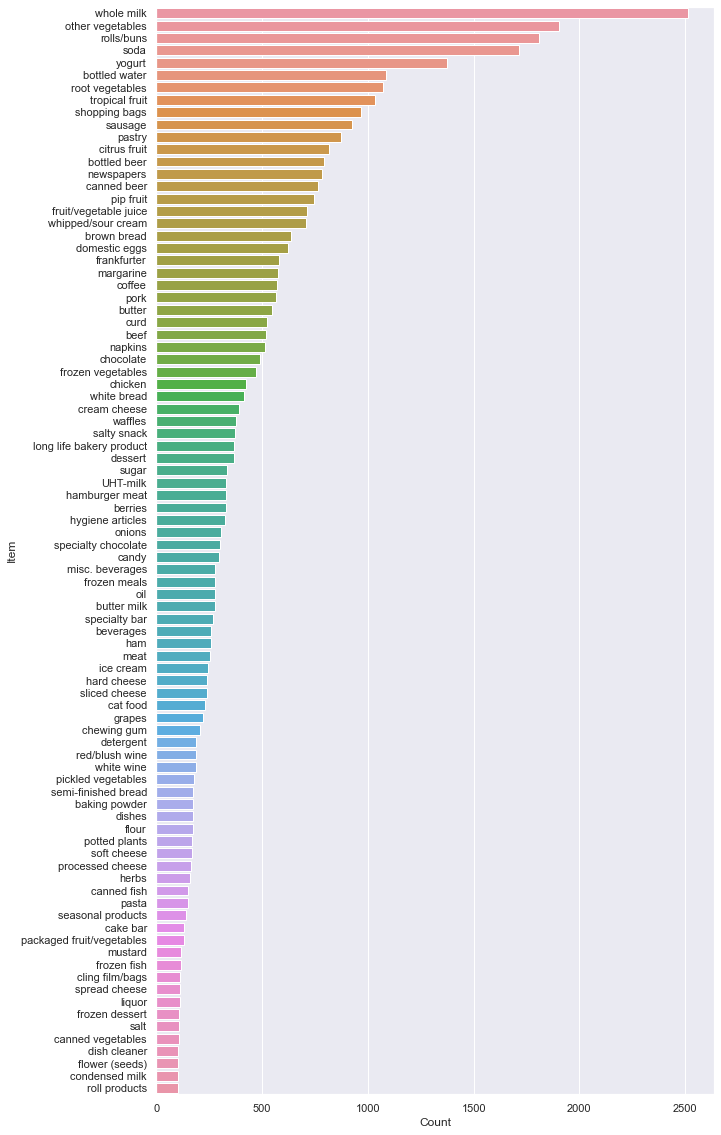

In [101]:
from collections import Counter
dataset_count = [u for a in dataset for u in a]
# print(dataset_count)
common_list = Counter(dataset_count).most_common(169)
# print(common_list)

pd.set_option('display.max_rows', None)
df = pd.DataFrame(common_list, columns =['Item', 'Count'])
df = df.loc[(df['Count'] >= 100)]
sns.set(rc={'figure.figsize':(10, 20)})
chart = sns.barplot(data=df,y='Item',x='Count',orient='h')
# chart.set_xticklabels(chart.get_xticklabels(), rotation=90, horizontalalignment='right')

# print(dataset)
final_list =  df['Item'].values.tolist()
dataset_final = []
for i in dataset:
    flag=True
    for j in i:
        if j not in final_list:
            flag=False
    if flag == True:
        dataset_final.append(i)
print(len(dataset_final))


# df

In [115]:
from mlxtend.preprocessing import TransactionEncoder
one_hot_trans = TransactionEncoder()
oh_data = one_hot_trans.fit(dataset_final).transform(dataset_final)
pd.set_option('display.max_rows', 10)
df = pd.DataFrame(oh_data, columns=one_hot_trans.columns_)
df

,UHT-milk,baking powder,beef,berries,beverages,bottled beer,bottled water,brown bread,butter,butter milk,...,specialty chocolate,spread cheese,sugar,tropical fruit,waffles,whipped/sour cream,white bread,white wine,whole milk,yogurt
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,True
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7306,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
7307,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,True,False
7308,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,True,False,False,False,False,False
7309,False,False,True,False,False,False,False,False,True,False,...,False,False,False,False,False,True,False,False,True,False


In [156]:
from mlxtend.frequent_patterns import apriori
frequent_itemsets = apriori(df, min_support=0.0037, use_colnames=True)
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))
frequent_itemsets[(frequent_itemsets['length'] == 2)]

,support,itemsets,length
88,0.006702,"(bottled water, UHT-milk)",2
89,0.004103,"(UHT-milk, domestic eggs)",2
90,0.006565,"(other vegetables, UHT-milk)",2
91,0.006018,"(UHT-milk, rolls/buns)",2
92,0.006702,"(soda, UHT-milk)",2
...,...,...,...
655,0.023937,"(whipped/sour cream, whole milk)",2
656,0.014499,"(whipped/sour cream, yogurt)",2
657,0.012584,"(white bread, whole milk)",2
658,0.005608,"(white bread, yogurt)",2


In [157]:
from mlxtend.frequent_patterns import association_rules
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.2)
rules["antecedent_len"] = rules["antecedents"].apply(lambda x: len(x))
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antecedent_len
0,(UHT-milk),(bottled water),0.029681,0.106825,0.006702,0.225806,2.113791,0.003532,1.153684,1
1,(UHT-milk),(other vegetables),0.029681,0.166872,0.006565,0.221198,1.325557,0.001612,1.069756,1
2,(UHT-milk),(rolls/buns),0.029681,0.180003,0.006018,0.202765,1.126455,0.000676,1.028551,1
3,(UHT-milk),(soda),0.029681,0.165778,0.006702,0.225806,1.362105,0.001782,1.077537,1
4,(UHT-milk),(yogurt),0.029681,0.120914,0.006292,0.211982,1.753164,0.002703,1.115566,1
...,...,...,...,...,...,...,...,...,...,...
709,"(other vegetables, tropical fruit, yogurt)",(whole milk),0.008891,0.230611,0.005334,0.600000,2.601779,0.003284,1.923471,3
710,"(other vegetables, yogurt, whole milk)",(tropical fruit),0.015183,0.091780,0.005334,0.351351,3.828211,0.003941,1.400173,3
711,"(other vegetables, tropical fruit, whole milk)",(yogurt),0.012173,0.120914,0.005334,0.438202,3.624091,0.003862,1.564774,3
712,"(tropical fruit, yogurt, whole milk)",(other vegetables),0.010395,0.166872,0.005334,0.513158,3.075162,0.003600,1.711290,3


In [158]:
rules[  (rules['antecedent_len'] == 1) &
        (rules['conviction'] < 1.2) &
        (rules['antecedents'] != {'whole milk'}) &
        (rules['consequents'] != {'whole milk'}) &
        (rules['antecedents'] != {'other vegetables'}) &
        (rules['consequents'] != {'other vegetables'}) &
        (rules['antecedents'] != {'rolls/buns'}) &
        (rules['consequents'] != {'rolls/buns'}) &
        (rules['antecedents'] != {'soda'}) &
        (rules['consequents'] != {'soda'}) &
        (rules['antecedents'] != {'yogurt'}) &
        (rules['consequents'] != {'yogurt'}) &
        (rules['antecedents'] != {'bottled water'}) &
        (rules['consequents'] != {'bottled water'}) ]


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antecedent_len
41,(cat food),(shopping bags),0.018602,0.087813,0.003830,0.205882,2.344557,0.002196,1.148680,1
48,(chicken),(root vegetables),0.038572,0.089181,0.008207,0.212766,2.385785,0.004767,1.156987,1
54,(citrus fruit),(tropical fruit),0.071673,0.091780,0.017371,0.242366,2.640746,0.010793,1.198760,1
86,(frozen vegetables),(root vegetables),0.036657,0.089181,0.007523,0.205224,2.301214,0.004254,1.146007,1
94,(grapes),(tropical fruit),0.017645,0.091780,0.003830,0.217054,2.364953,0.002210,1.160004,1
105,(hard cheese),(sausage),0.018465,0.085488,0.003967,0.214815,2.512818,0.002388,1.164709,1
132,(oil),(root vegetables),0.020654,0.089181,0.004651,0.225166,2.524824,0.002809,1.175502,1
162,(pip fruit),(tropical fruit),0.063603,0.091780,0.015456,0.243011,2.647767,0.009619,1.199780,1
164,(pork),(root vegetables),0.049378,0.089181,0.010259,0.207756,2.329610,0.005855,1.149671,1
